# Supernova neutrino flux 
This notebook demonstrates the importance of neutrino flux in explosive nucleosynthesis.

## Importing libraries 

First, we check for the necessary libraries and download them:

In [4]:
import sys, subprocess, pkg_resources
required = {'numpy','wnutils','matplotlib'}
installed = {pkg.key for pkg in pkg_resources.working_set}
missing = required - installed

if missing:
    subprocess.check_call([sys.executable,'-m','pip','install','--quiet',*missing])

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import wnutils.xml as wx
import io, requests
from ipywidgets import interact, interactive
import ipywidgets as widgets

## Neutrino Flux 

Neutrinos play an important role in cooling the newly formed neutron star in CCSN, heating the supernova shock, and explosive nucleosynthesis. The recently formed neutron star is cooled from neutrino emission which is different from cooling from photon emission since neutrons are fermions and thus are governed by Fermi-Dirac statistics following from the Pauli exclusion principle. The equilibrium intensity of neutrinos is given by: 
\begin{gather}
I_\nu = \frac{2h\nu^3/c^2}{e^{h\nu/kT}+1}\notag
\end{gather}

Which differs from the Planck Law for photons. We can plot this intensity vs frequency: 

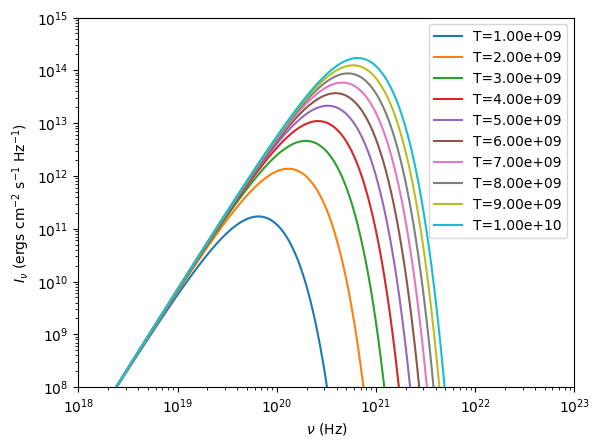

In [2]:
def I(h, k, c, nu, T):
    return (2*h*nu**3/(c**2))/(np.exp(h*nu/(k*T))+1)

nu = np.logspace(9,22,1000)

isotherms = [1e9,2e9,3e9,4e9,5e9,6e9,7e9,8e9,9e9,1e10]

#Fundamental constants - CGS
h = 6.625e-27
k = 1.38e-16
c = 3e10

#plot the spectrum
fig, ax = plt.subplots()
for T in isotherms:
    ax.plot(nu, I(h,k,c,nu,T), label = f'T={T:.2e}')
ax.set_xlabel(r'$\nu$ (Hz)')
ax.set_ylabel(r'$I_\nu$ (ergs cm$^{-2}$ s$^{-1}$ Hz$^{-1}$)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([1e8,1e15])
ax.set_xlim([1e18,1e23])
ax.legend()
plt.show()

The flux for an isotropic emitter as a function of radius is:
\begin{gather}
F = \pi B (R/r)^2 \notag
\end{gather}
where B is the brightness (intensity integrated over all frequencies). Where we can obtain the brightness with the simple relationship:
\begin{gather}
B = \int I_\nu d\nu = a_{fermion} T^4 \notag
\end{gather}
where $a_{fermion}$ is given by:
\begin{gather}
a_{fermion} = \frac{7}{8} a_{photon}
\end{gather}

Using this we can plot the flux as a function of radius and neutron star temperature:

In [3]:
def F(R, T):
    r = np.linspace(5e7, 1.2e10, 1000)
    a_photon = 7.56e-15
    B = 7/8 * a_photon * T**4
    return r, np.pi * B * (R/r)**2

def f(R_ns, T_ns):
    '''Function for interactive plot'''
    r_list, nu_flux = F(R_ns, T_ns)
    fig, ax = plt.subplots()
    ax.plot(r_list, nu_flux)
    ax.set_title(f'Neutrino flux as a function of radius at T={T_ns:.2e}')
    #ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('Radius (cm)')
    ax.set_ylabel('Flux (ergs s$^{-1}$ cm$^{-2}$)')
    plt.show()


interact(f,T_ns = widgets.BoundedFloatText(value=1e10, min=1e9, max = 1e11, step=1e9, descriptions='T_ns(K)', disabled=False),
            R_ns = widgets.BoundedFloatText(value = 1.1e6 , min=1e6,max=5e9,step = 1e8, descriptions ='R_ns(cm)', disabled=False ))

interactive(children=(BoundedFloatText(value=1100000.0, description='R_ns', max=5000000000.0, min=1000000.0, s…

<function __main__.f(R_ns, T_ns)>

## Neutrino interaction rate

We now aim to create a simple model for the neutrino interactions as a function of radius. We have obtained the flux which is energy per area per second. If we divide this by the average neutrino energy $<E>$ and multiply by the interaction cross section for the relevant reactions we obtain a rate that is the number of interactions per second. 

We can then plot the number of neutrinos passing through a given area per second vs. radius:

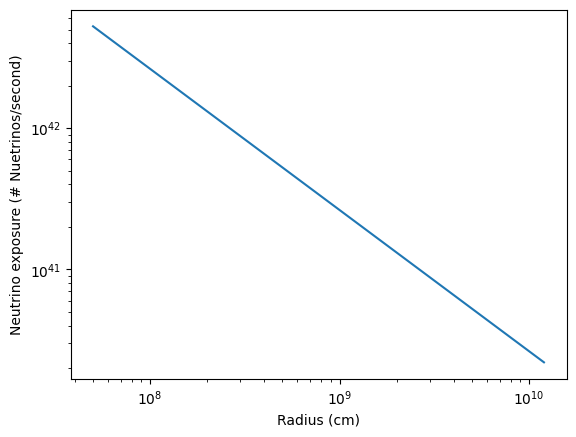

In [4]:
E_nu = 12e-12 #electron neutrino-ergs
R_ns = 1.1e6
T_ns = 1e10 

def rate(R, T, E):
    radius, flux = F(R, T)
    rate = flux/E * 4* np.pi * radius 
    return rate, radius

fig, ax = plt.subplots()
rate, radius = rate(R_ns, T_ns, E_nu)
ax.plot(radius, rate)
ax.set_xlabel('Radius (cm)')
ax.set_ylabel('Neutrino exposure (# Nuetrinos/second)')
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

## The alpha-rich freezout 

Neutrino interactions are particularly relevant for the production of key isotopes such as $^{26}$Al and $^{44}$Ti in alpha-rich freezeout. 

Alpha-rich freezeout occurs during the propagation of the shockwave through the innermost Fe/Ni region of the star. The rapid heating disentegrates the heavy nuclei and the subsequent cooling from the adiabetic expansion happens so quickly that many of the remaining nucleons are locked up in alpha particles, hence the term alpha rich freezeout. 

It has been observed that knots of the innermost $\alpha$ freezeout material is shot through the star and thus we expect the neutrino interactions decrease with time. 

We begin here by examining the nucleosynthesis in alpha-rich freezeout via a single-zone network calculation. The zone was given a trajectory of temperature, radius, and density as a function of time.

First, we import the data:

In [5]:
alpha_xml = wx.Xml(io.BytesIO(requests.get('https://osf.io/9m7ju/download').content))

Now we can plot the abundances of $^{26}$Al and $^{44}$Ti as a function of various different properties with the wnutils python package: 

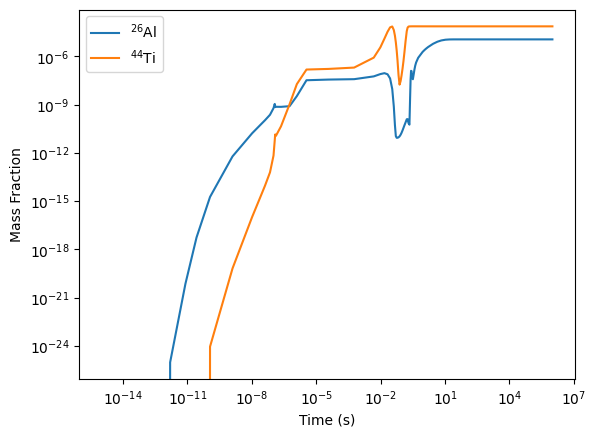

In [6]:
alpha_xml.plot_mass_fractions_vs_property('time',['al26','ti44'], xscale = 'log', yscale = 'log', 
                                           use_latex_names = True, xlabel = 'Time (s)')

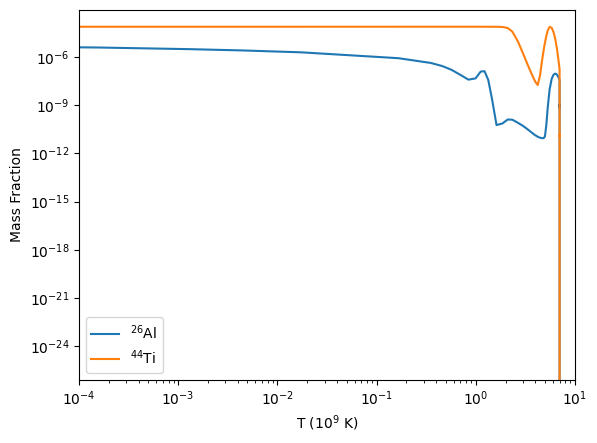

In [7]:
alpha_xml.plot_mass_fractions_vs_property('t9',['al26','ti44'], xscale = 'log', yscale = 'log', 
                                           use_latex_names = True, xlabel = 'T ($10^9$ K)', xlim = [1e-4, 10])

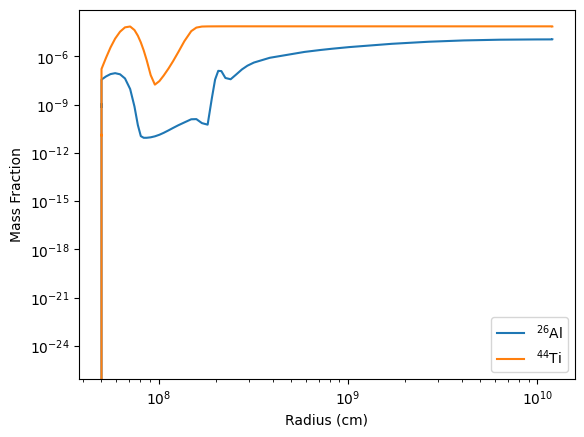

In [8]:
alpha_xml.plot_mass_fractions_vs_property('radius',['al26','ti44'], xscale = 'log', yscale = 'log', 
                                           use_latex_names = True, xlabel = 'Radius (cm)')

Similarly, we can plot various properties vs time to get an idea of the trajectory of this alpha freeze-out material:

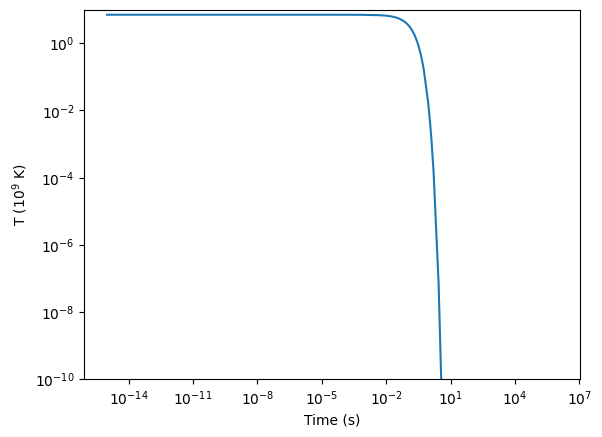

In [9]:
alpha_xml.plot_property_vs_property('time', 't9', xlabel = 'Time (s)', ylabel = ('T (10$^9$ K)'), 
                                   xscale = 'log', yscale = 'log', ylim = [1e-10, 10])

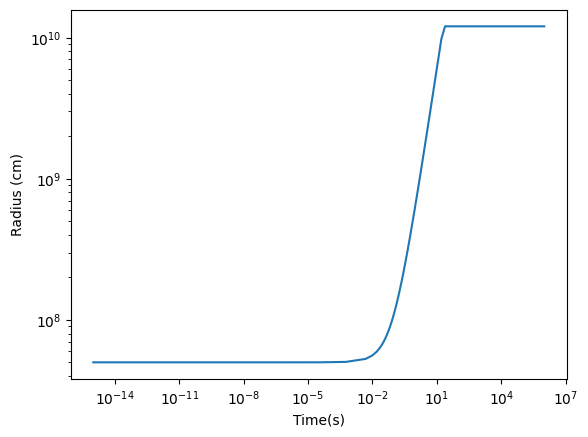

In [10]:
alpha_xml.plot_property_vs_property('time', 'radius', xscale = 'log', yscale = 'log', xlabel = 'Time(s)',
                                   ylabel = 'Radius (cm)')

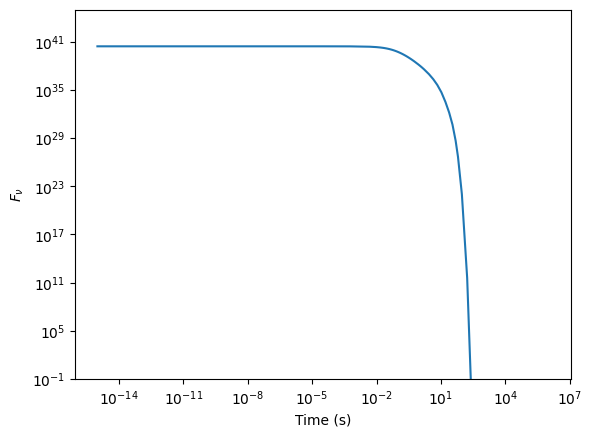

In [11]:
alpha_xml.plot_property_vs_property('time',('Nu flux', 'neutrino_e'), xscale = 'log', yscale = 'log', ylim = [1e-1,1e45], 
                                   ylabel = r'$F_\nu$', xlabel = 'Time (s)')

Finally, we can plot the neutrino flux vs. radius for electron neutrinos:

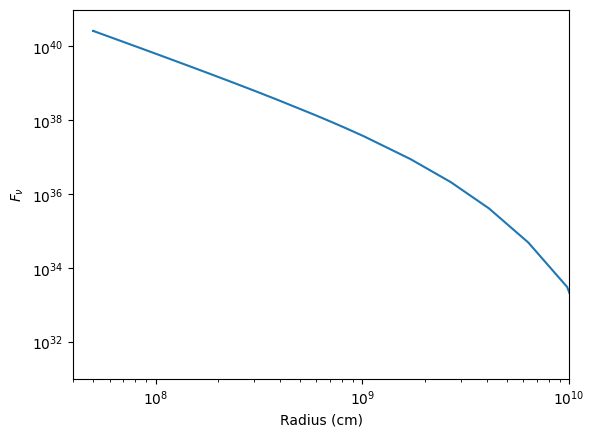

In [12]:
alpha_xml.plot_property_vs_property('radius',('Nu flux','neutrino_e'), xscale = 'log', yscale = 'log', 
                                   xlabel = 'Radius (cm)', ylabel = r'$F_\nu$', ylim = [1e31,1e41], xlim = [4e7, 1e10])

Which is a drastically different flux than that predicted by our simple model.

## Comparing alpha-rich freezeout nucleosynthesis to neutrino flux

For this section we compare the derived neutrino interaction rate which goes like $\frac{1}{r^2}$ to the neutrino interactions in alpha-rich freezeout. 

Here we define a routine to get the number of neutrino interactions from the network flows:

Finally we plot the interactions in the alpha-rich freezeout as a function of radius and the derived interactions as a function of radius and compare the results: 